### Getting Started

Dataset comes from Kaggle repository [link](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/data).  Almost 30,000 Songs from the Spotify API. See the readme file for a formatted data dictionary table.



### Problem 2: Read in the Data

Use pandas to read in the dataset `spotify_songs.csv` and assign to a meaningful variable name.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [34]:
df = pd.read_csv('data/spotify_songs.csv')

df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### Problem 3: Understanding the Features



**Objective is to recommend songs to users**

# **Methods**

In [35]:
#Convert date to year
def convert_to_year(date_value):
    """
    Convert date or year to year format
    """
    if pd.isna(date_value):
        return date_value  # Keep NaN as is

    # Convert to string to handle different input types
    date_str = str(date_value).strip()

    # If it's already just a year (4 digits)
    if date_str.isdigit() and len(date_str) == 4:
        return int(date_str)

    # Try to parse as date and extract year
    try:
        # Handle various date formats
        parsed_date = pd.to_datetime(date_str, errors='coerce')
        if not pd.isna(parsed_date):
            return parsed_date.year
    except:
        pass

    # If parsing fails, try to extract 4-digit year from string
    import re
    year_match = re.search(r'\b(19|20)\d{2}\b', date_str)
    if year_match:
        return int(year_match.group())

    # If all fails, return original value or NaN
    return np.nan

# **Preprocessing**

In [36]:
#Remove rows where track_name, track_artist,track_album_name is na

df.dropna(subset=['track_name', 'track_artist', 'track_album_name'], inplace=True)

df.shape

(32828, 23)

In [37]:
#Rename columns for readability

df.rename(columns={'playlist_genre': 'genre', 'playlist_subgenre': 'subgenre'}, inplace=True)

In [38]:
# Add Spotify URL for the UI

df['spotify_url'] = 'https://open.spotify.com/track/' + df['track_id']

In [39]:
# Conver track_album_release_date to year
df['year'] = df['track_album_release_date'].apply(convert_to_year)

#Drop track_album_release_date
df.drop(columns=['track_album_release_date'], inplace=True)

# Modeling

In [40]:
features =  ['danceability', 'acousticness', 'loudness', 'speechiness','instrumentalness', 'energy', 'liveness', 'valence', 'tempo', 'duration_ms']

X = df[features]


In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaler

StandardScaler()

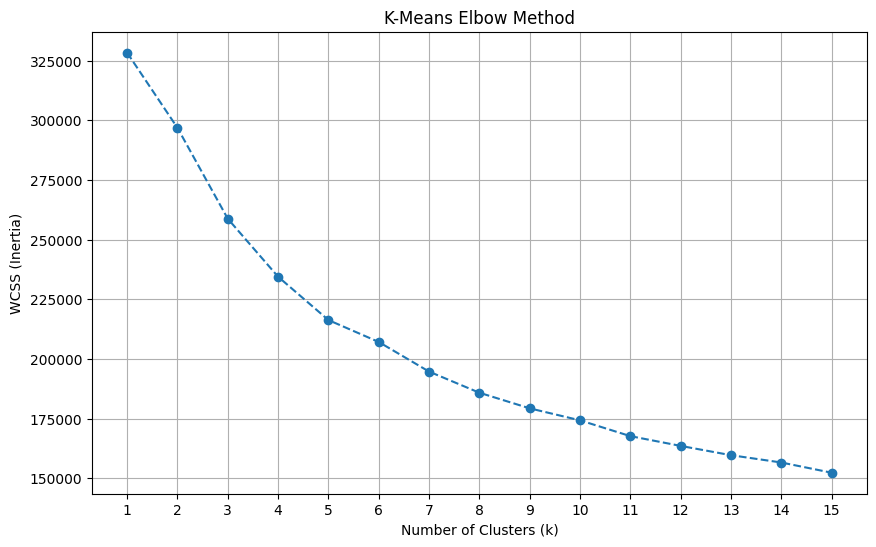

In [42]:
# List to store the Within-Cluster Sum of Squares (Inertia)
wcss = []

# Testing cluster counts from 1 to 15
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
plt.title('K-Means Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()


In [43]:
#Per the elbow plot error rate drop is not sharp after 4 so choosing cluster = 4
kmean = KMeans(n_clusters = 4, random_state = 42)
df['cluster_kmean'] = kmean.fit_predict(X_scaled)

kmean
kmean.cluster_centers_

array([[-6.84368580e-01, -4.64462701e-01,  4.74825703e-01,
        -1.94645269e-01, -2.79162977e-01,  5.59845368e-01,
         3.20786016e-01, -3.96457821e-01,  4.39288104e-01,
         1.44037806e-02],
       [ 4.19017401e-02, -4.69602380e-01, -7.49607382e-02,
        -3.44006982e-01,  2.91017214e+00,  4.80178510e-01,
         3.15378507e-03, -5.23938737e-01,  1.58695523e-01,
         4.22064664e-01],
       [-3.27013531e-01,  1.46618871e+00, -1.22525797e+00,
        -1.66102078e-01,  1.02068554e-03, -1.45041579e+00,
        -2.08832562e-01, -4.83858906e-01, -2.89758004e-01,
         1.15650329e-02],
       [ 6.62697564e-01, -1.13723230e-01,  1.14361533e-01,
         2.84063001e-01, -3.27569335e-01,  2.98716966e-02,
        -1.73910833e-01,  6.01933508e-01, -2.65794240e-01,
        -9.55262364e-02]])

In [44]:
df.cluster_kmean.value_counts().sort_index()

,count
cluster_kmean,
0,10949
1,2609
2,5391
3,13879


# PCA


In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

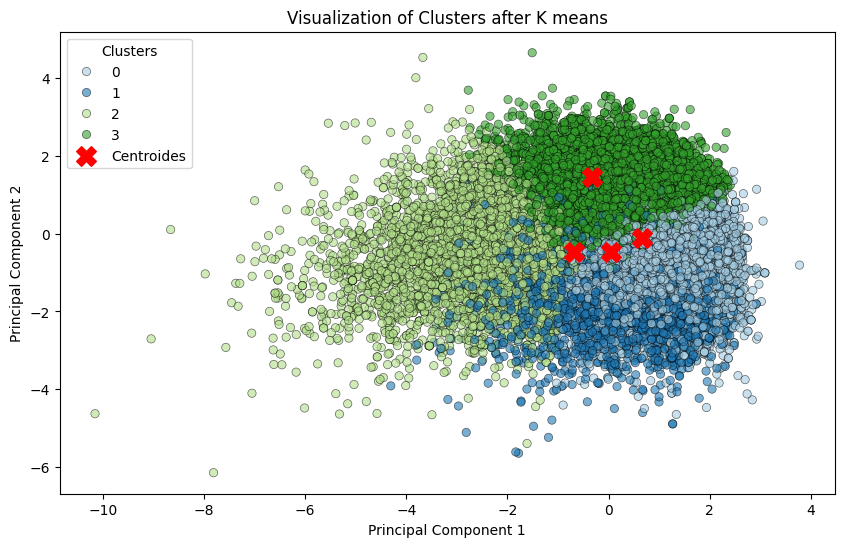

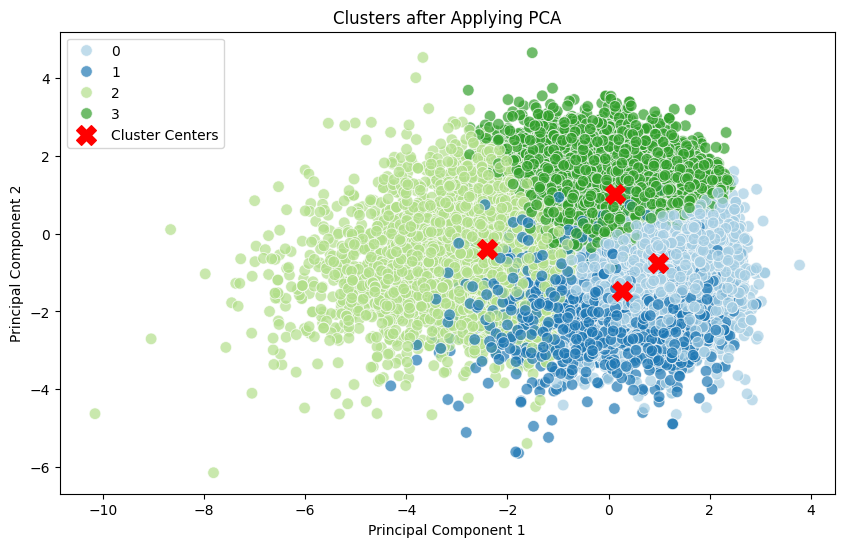

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0],
                y=X_pca[:, 1],
                hue=df['cluster_kmean'],
                palette='Paired',
                alpha=0.6,
                edgecolor='k')

# Adding the cluster centers
centers = kmean.cluster_centers_

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroides')

plt.title('Visualization of Clusters after K means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.grid(False)
plt.show()


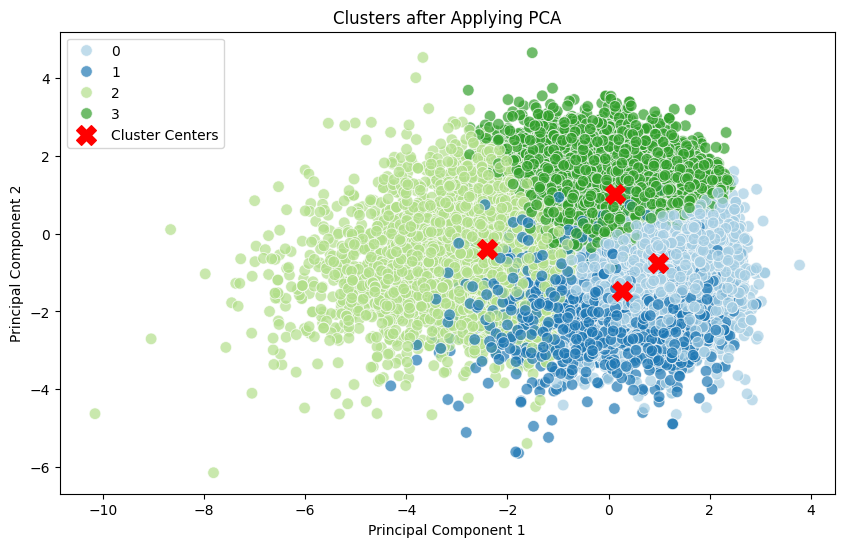

In [47]:
centers_pca = pca.transform(centers)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster_kmean'], palette='Paired', s=70, alpha=0.7)

# Projecting the centers to the 2D PCA space
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title('Clusters after Applying PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)
plt.show()

In [57]:
cluster_1_features = df[df['cluster_kmean'] == 0][features].mean()
print("Mean of Features for Cluster 0:")
print(cluster_1_features)
print()

cluster_2_features = df[df['cluster_kmean'] == 1][features].mean()
print("Mean of Features for Cluster 1:")
print(cluster_2_features)
print()

cluster_3_features = df[df['cluster_kmean'] == 2][features].mean()
print("Mean of Features for Cluster 2:")
print(cluster_3_features)
print()

cluster_4_features = df[df['cluster_kmean'] == 3][features].mean()
print("Mean of Features for Cluster 3:")
print(cluster_4_features)
print()

Mean of Features for Cluster 0:
danceability             0.555155
acousticness             0.072864
loudness                -5.301751
speechiness              0.087155
instrumentalness         0.022252
energy                   0.799914
liveness                 0.240077
valence                  0.417158
tempo                  132.595921
duration_ms         226698.209060
dtype: float64

Mean of Features for Cluster 1:
danceability             0.660951
acousticness             0.072195
loudness                -6.944686
speechiness              0.072216
instrumentalness         0.737460
energy                   0.785445
liveness                 0.190683
valence                  0.388447
tempo                  125.151966
duration_ms         251086.991568
dtype: float64

Mean of Features for Cluster 2:
danceability             0.607566
acousticness             0.497539
loudness               -10.381279
speechiness              0.090360
instrumentalness         0.084973
energy                

In [48]:
random_samples = df.groupby('cluster_kmean').sample(n=3, random_state=42)

# Display the track name and artist for each sample
print(random_samples[['track_name', 'track_artist', 'cluster_kmean']])

                            track_name   track_artist  cluster_kmean
15069        In the End I'm Back to Me  Steady Rollin              0
5471                      Chasing Fire           Lauv              0
32794   Lightning (feat. John Rzeznik)      Cash Cash              0
5586                     Ready to Diet     Kevoe West              1
10747                         La Câlin  Serhat Durmus              1
18720                        So Afraid         Thelin              1
7879                        The Rhythm          Kwame              2
8471                     Love is a War     Jelly Roll              2
25872                Midnight Mischief   Jordan Rakei              2
20536                  Yo No Sé Mañana   Luis Enrique              3
16844                 Mine By Tomorrow        Hartman              3
2524   There's Nothing Holdin' Me Back   Shawn Mendes              3


# Save data to a new CSV file

In [52]:
df.to_csv('data/clustered_songs.csv', index=False, encoding='utf-8')